# Intro


Written by JRB 2021-02-08

This is a notebook to show you a handy way for importing & storing data when you have multiple files to work with (like you do in lab 2). It assumes you are working in the folder that has the data files in them. 

If you are doing something more than once, twice, or three times- write a function! You will be uploading .abf files **alot** this semester, so it would be nice to execute that in a single line of code. Or, have a function you can easily adjust if the data type changes.

In general practice, I find it easiest to write a function that does work on a single file and then iterate over that function using a for loop to run it on all the files. Storing the information in lists of lists is great because you can have different dimensions for each item (e.g. the five recordings you have been given are not the same number of samples & won't fit nicely into a matrix). You should note, there are multiple ways to do this, and this notebook will walk you through one.

# Code

In [1]:
# libs
import matplotlib
import numpy as np
import matplotlib.pyplot as pl
import scipy
import pyabf
import seaborn as sns
import os

sns.set_context("talk") # this just makes font bigger in your plots

The .abf files we have you this week all have a common structure to their name - 2110600X.abf where X goes from 1 to 5. I am lazy, and I would not like to type them five times, so I am going to write a function that does that for me.

In [2]:
def data_namer(number):
    # %i = integer goes here %(number) = the integer to be placed
    return "2110600%i.abf"%(number)

# test it
data_namer(1), data_namer(2)

('21106001.abf', '21106002.abf')

Okay great, that saves me some typing. And it allows me to iteratively create names, which will come in handy later. But what if your files don't have the same base name and you just want to grab all the .abf files in a folder? This is how you'd do that.

In [3]:
# this lists the files in your current working directory
dir_files = os.listdir(".") 

# create a list to put file names into
fnames = []

# grab only files w/ .abf & add them to the list
for file in dir_files:
    if ".abf" in file:
        fnames.append(file)

In [4]:
# see what is there
print('1:', fnames)

# to ignore the multi, drop off the last entry
print('2:', fnames[0:-1])

print('Iterate:')
# iterate like this:
for file in range(len(fnames) - 1):
    print(fnames[file])

1: ['single.abf', 'sample2.abf', 'sample3.abf', 'sample.abf', '21106000.abf', '21106001.abf', '21106003.abf', '21106002.abf', 'episodic stim.abf', '21106005.abf', '21106004.abf', 'multi.abf']
2: ['single.abf', 'sample2.abf', 'sample3.abf', 'sample.abf', '21106000.abf', '21106001.abf', '21106003.abf', '21106002.abf', 'episodic stim.abf', '21106005.abf', '21106004.abf']
Iterate:
single.abf
sample2.abf
sample3.abf
sample.abf
21106000.abf
21106001.abf
21106003.abf
21106002.abf
episodic stim.abf
21106005.abf
21106004.abf


I am going to use the first naming scheme moving forward. For the next step, I'm going to take all the code from the notebook on Monday & just put it into a function so I don't have to run multiple lines of code for each file. As a mentioned above, I will write this function with a single file in mind.

In [5]:
def abf_load_and_extract(abf_file):
    """Function to load & extract .abf file data for NeuroLab 2
    
    inputs:
    -------
    abf_file : (str) name of abf file you want to extract info from
    
    returns:
    -------
    nerve : (arr) voltage of nerve recording channel
    muscle: (arr) voltage of muscle recording channel 
    times : (arr) time in seconds of recording"
    *note* you can also return the nerve & muscle label if you want, just add them in
    """
    # load abf using pyabf
    data = pyabf.ABF(abf_file)
    
    # nerve
    data.setSweep(sweepNumber=0, channel=0) # nerve extracellular recording
    nerve = data.sweepY
    nerve_label = data.sweepLabelY
    
    # muscle
    data.setSweep(sweepNumber=0, channel=1) # muscle intracellular recording
    muscle = data.sweepY
    muscle_label = data.sweepLabelY
    
    # times
    times = data.sweepX
    
    return nerve, muscle, times
    

Let's load the first file & see what happens 

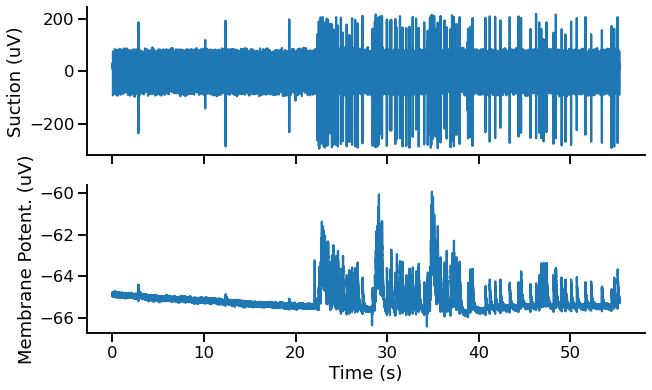

In [6]:
# run function
nerve1, muscle1, times1 = abf_load_and_extract(data_namer(1))

# quick plot
fig,ax = pl.subplots(2,1, sharex = True, figsize=(10,6))

ax[0].plot(times1, nerve1)
ax[1].plot(times1, muscle1)

# tidy the plot
ax[0].set(ylabel = "Suction (uV)")
ax[1].set(xlabel = "Time (s)", ylabel = "Membrane Potent. (uV)")
sns.despine() # removes the boxes


Looks legitimate! What if I want to load all of the data files. Well, I could have nerve1, nerve2, ..., nerve5 and call the function 5 different times. But that is kid of a pain and not great coding practices. Instead, I'm going to loop over the function I wrote & pass in a new file on each loop. I will then save all the info together in lists rather than separate arrays for each file.

In [7]:
# first I want to show you how I will pass the names in

num_files = 5
for f_num in range(1, num_files + 1): # I want numbers 1,2,3,4,5
    
    print('Loop', f_num, ':', data_namer(f_num))

Loop 1 : 21106001.abf
Loop 2 : 21106002.abf
Loop 3 : 21106003.abf
Loop 4 : 21106004.abf
Loop 5 : 21106005.abf


In [8]:
# Now just pass into the function
num_files = 5

# need to make space to append to
nerveL = []
muscleL = []
timesL = []

for f_num in range(1, num_files + 1): 
    # for a single file, load & extract the info
    nerve, muscle, times = abf_load_and_extract(data_namer(f_num))  
    
    # now append that info to a list outside the loop so it doesn't get
    # written over on the next loop (similar to push! in Julia)
    
    nerveL.append(nerve)
    muscleL.append(muscle)
    timesL.append(times)

    # now repeat for the next file


In [37]:
# lets explore what we have

print('number of files:', len(nerveL))

print('length of first recording:', timesL[0][-1])

print('third recording muscle info: ', muscleL[2])

number of files: 5
length of first recording: 55.398300000000006
third recording, muscle info:  [-53.0701 -53.1006 -53.1616 ... -55.3894 -55.4199 -55.3894]


Great, so now things are all stored together. If I want information for the first file, it's stored in the list under the 0 index. So, lets recreate the exact same plot above using this list scheme.

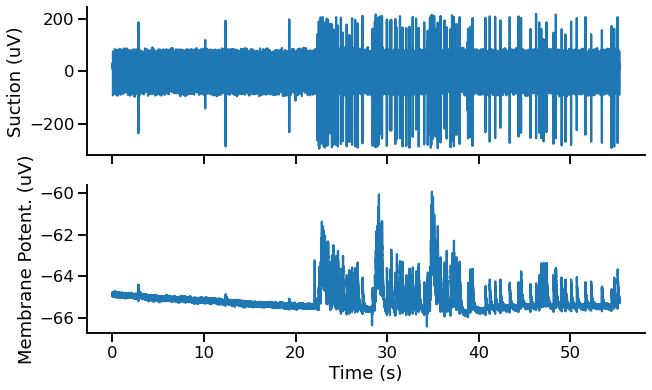

In [61]:
# quick plot
fig,ax = pl.subplots(2,1, sharex=True, figsize=(10,6))

ax[0].plot(times1, nerveL[0])
ax[1].plot(times1, muscleL[0])

# tidy the plot
ax[0].set(ylabel = "Suction (uV)")
ax[1].set(xlabel = "Time (s)", ylabel = "Membrane Potent. (uV)")
sns.despine() # removes the boxes


Okay great it looks the same. But, maybe you're not convinced about this list of list thing. I get it, it's kinda weird and cumbersome. What if I don't know what to do for my figure and I just want to visualize everything first and then decide (aka what you will do every week)? Let's try that.

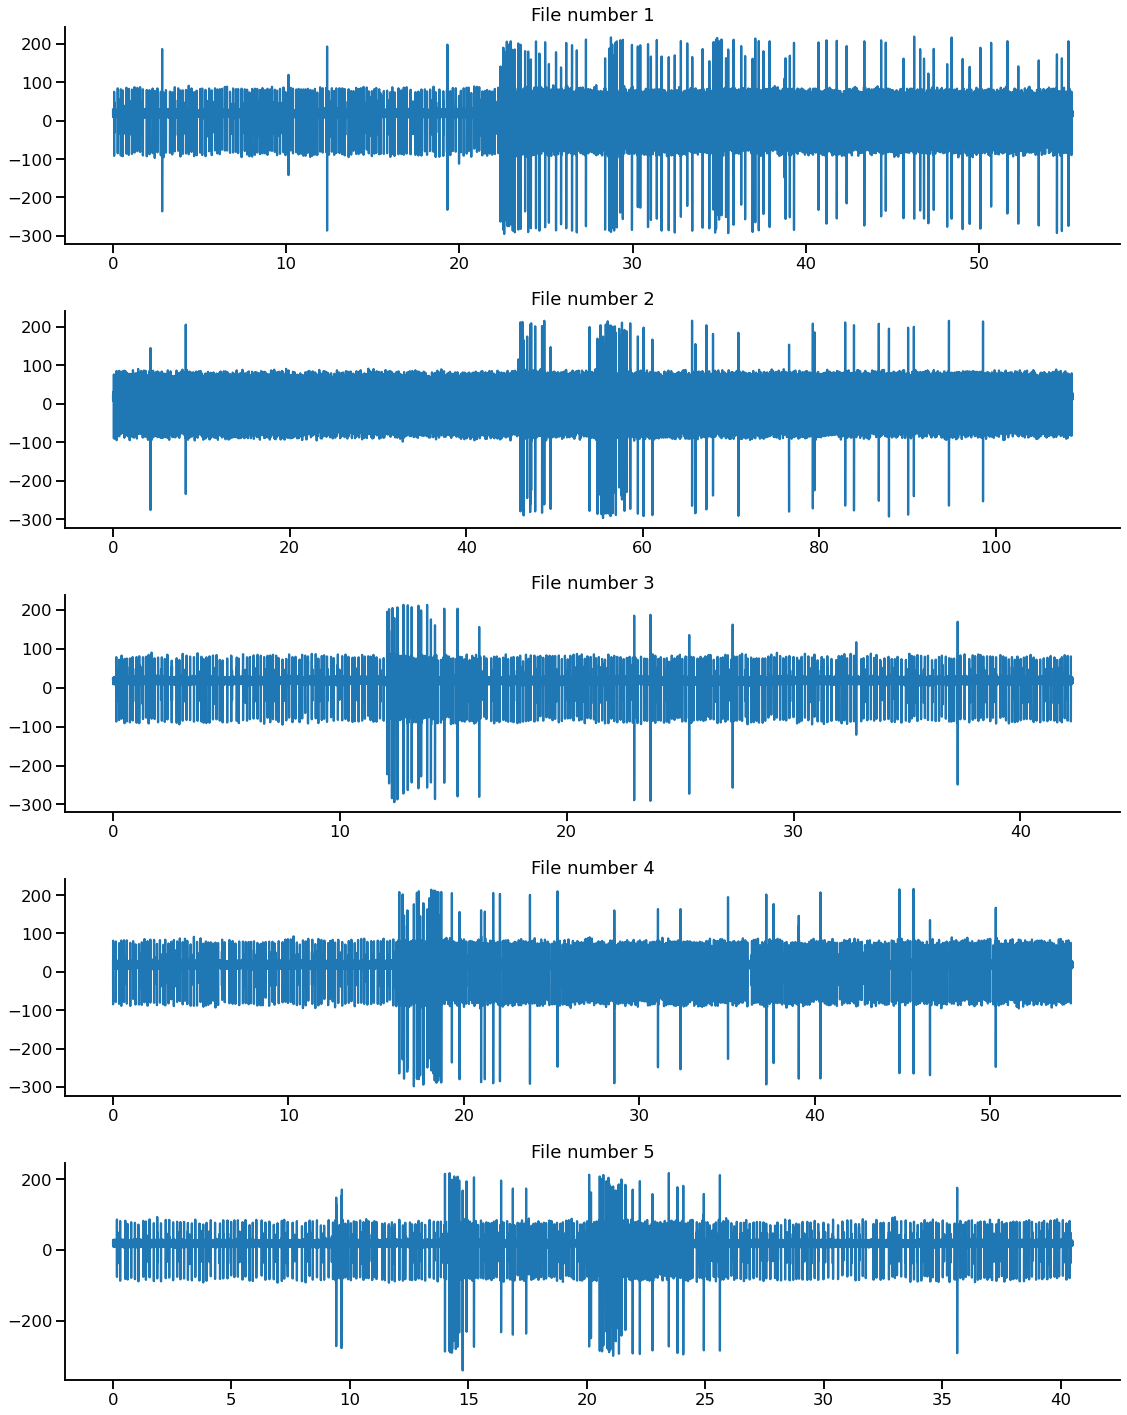

In [62]:
fig,ax = pl.subplots(num_files, 1, figsize=(16,20))

for file in range(num_files):
    
    # for each file, plot the nerve recording 
    ax[file].plot(timesL[file], nerveL[file])
    # add a title
    ax[file].set_title('File number %i'%(file+1))
    
# plot tidying
pl.tight_layout()
sns.despine()

Alright, hopefully you are sold. Good luck!